In [54]:
# NOT FINISHED CHANGING TO USE BOUNDARY CONDITIONS FOR ALL COMPARISONS WITH THE FAR FIELD

In [111]:
FrameName = 'Mesh17-Final_ID_1_IT_3_IR_2_IE_5x_LT_1_LE_25kPa_P_10%'
FrameName = 'ZZ_Change_LE_5p4_P_10p81_ID_1p1_IT_3_IR_1p9_IE_9x_LT_0p5_LE_17500'

In [112]:
# %matplotlib notebook 
# Uncomment above for interactive plots
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sym
from sympy import *
from scipy import integrate
import scipy.optimize
import scipy.special
cmap = plt.get_cmap("tab10")
from matplotlib import cm
import itertools
import os, time
from scipy.optimize import fsolve
import scipy.optimize as optimize
from scipy.io import savemat

def Gauss(x, A, u, s, C):
    return A*np.exp(-(x-u)**2/(2*s**2))+C

def Gauss0(x, A, u, s):
    return A*np.exp(-(x-u)**2/(2*s**2))

def Sig(x, A, u, f, C):
    return A*scipy.special.erf((x-u)/f)+C

def Lor(x, A, u, T, C):
    return np.pi*T/2*A*T/(2*np.pi*((x-u)**2+(T**2)/4)) + C

def LoadFrame(FrameName):
    Frame = []
    OUT = ['LBU2','P1U2','P2U2','LTU2','LBS2']
    for nOUT in range(0,len(OUT)):
        try:
            temp = np.load(r'C:\Users\21705319\ Python Scripts\Project 1\AbaqusXYData\A_SubmitOne_LastFrame'+'\\'+FrameName+'_'+OUT[nOUT]+'.npy') 
            Frame.append(temp[np.argsort(temp[:, 0])])
        except:
                try:
                    temp = np.load(r'C:\Users\21705319\ Python Scripts\Project 1\\AbaqusXYData\Final'+'\\'+FrameName+'_'+OUT[nOUT]+'.npy') 
                    Frame.append(temp[np.argsort(temp[:, 0])])
                except:
                    print('File '+FrameName+'.npy can not be found')
                    return []
    return Frame

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Have:
- XY data file for each (Sample,Layer,Preload,Output) combination
- Different number of points for the outputs depending on where they're taken from

Want:
- Ability to specify any 2 variables for a 2D plot or any 3 for a 3D plot
- Import relevant results, generate plot, delete variables from memory
- Ability to loop the above to generate ranges of results

Plan:
- Specify controlled variables and their value for the plot
- Specify axis variables
- Specify required output style and any metrics
- Import required data
- Make any transformations required
- Find any single points from XY data required
- Visualise results

In [113]:
# ID: Inclusion Depth
# IT: Inclusion Thickness
# IR: Inclusion Radius
# IE: Inclusion Elasticity
# LT: Layer Thickness
# LE: Layer Elasticity
# P: Preload (strain in the layer in the far field)
# OUT: various 2D plots with radial coordinate
    # LBU2: Layer Bottom Axial Displacement
    # P1U2: 1st Particle Layer Axial Displacement (only valid for layer thickness > 500um)
    # P2U2: 2nd Particle Layer Axial Displacement (only valid for layer thickness > 1mm)
    # LTU2: Layer Top Axial Displacement (can be treated as a single point but data is a 2d Plot)
    # LBS2: Layer Bottom Axial Stress

<IPython.core.display.Javascript object>


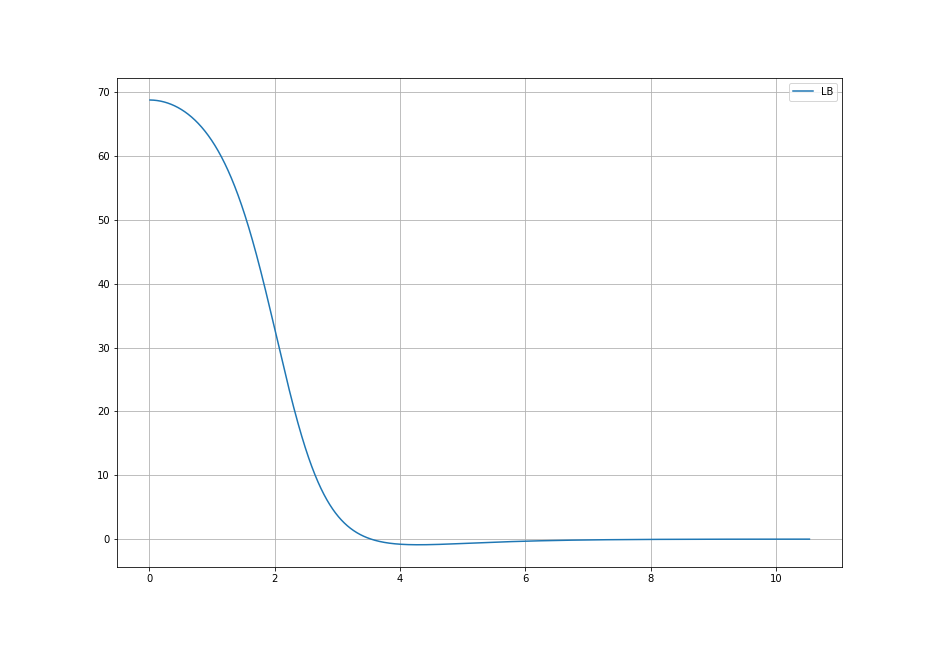

In [114]:
# Change variables at the beginning of the loop, control plotting with triple quotes
DisplacementDiff_LB = []
DisplacementDiffFWHM_LB = []
DisplacementDiffGaussFWHM_LB = []

DisplacementDiff_P1 = []
DisplacementDiffFWHM_P1 = []
DisplacementDiffGaussFWHM_P1 = []

DisplacementDiff_P2 = []
DisplacementDiffFWHM_P2 = []
DisplacementDiffGaussFWHM_P2 = []

LTinf = []

StressContrast_OP = []
StressContrastRatio_OP = []
StressFWHM_OP = []
StressGaussFWHM_OP = []
StressSigFWHM_OP = []
Stress10t90_OP = []
StressGaussFWHM_OP_FitStandardError = []
StressRMSE_OP = []
Stress_OP = []

StressContrast_SOP = []
StressContrastRatio_SOP = []
StressFWHM_SOP = []
StressGaussFWHM_SOP = []
Stress10t90_SOP = []
StressRMSE_SOP = []
Stress_SOP = []
    
StressContrast_BOP = []
StressContrastRatio_BOP = []
StressFWHM_BOP = []
StressGaussFWHM_BOP = []
Stress10t90_BOP = []
StressRMSE_BOP = []
Stress_BOP = []

StressContrast_BOP2 = []
StressContrastRatio_BOP2 = []
StressFWHM_BOP2 = []
StressGaussFWHM_BOP2 = []
StressSigFWHM_BOP2 = []
Stress10t90_BOP2 = []
StressRMSE_BOP2 = []
Stress_BOP2 = []
    
StressContrast_LB = []
StressFWHM_LB = []
StressGaussFWHM_LB = []
Stress10t90_LB = []
StressRMSE_LB = []
Stress_LB = []

# ZZ_Change_LE_5p4_P_10p81_ID_1p1_IT_3_IR_1p9_IE_9x_LT_5p8_LE_17500

BackgroundElasticity = 17500.0
SampleThickness = 0.0054

UseHyperelasticLayer = 0;
Mixtures = ['P7676_1to1','RT601_5to1','20201207_RT601_10to1to10','20201207_RT601_10to1to20','20201207_RT601_10to1to30','20201208_P7676_2to1','20201208_RT601_10to1to60','20201214_SILPURAN2400_1to1to1','20201214_SILPURAN2400_1to1to2','20201214_SILPURAN2400_2to2to3','20201215_SILPURAN2400_1to1to3','20210105_SILPURAN2400_4to4to9','20210106_SILPURAN2400_4to4to7']
MixNum = 8; # UseHyperelasticLayer = 1;
MooneyRivlin = [-278.206618,2700.3173,0] # [2401.5,413.7,0] # UseHyperelasticLayer = 2;
C10 = MooneyRivlin[0]
C01 = MooneyRivlin[1]
Poly_6 = [2493.3,9105.6,-64998,224354.4,-367446.2,229496.7,1.62595236E-05,0,0,0,0,0] # UseHyperelasticLayer = 3;
Poly_6_NC = [3314.96673,4431.67261,-40344.6954,191582.38,-443940.015,398210.568,1.22295467E-05,0,0,0,0,0] # UseHyperelasticLayer = 4;


# Set controlled variables using nVar, others will change via loop below
ModelName = 'Mesh17-Final'
ID = [0.0011]
nID = 0
IT = [0.003]
nIT = 0
IR = [0.0019]
nIR = 0
IE = [9.0*BackgroundElasticity]
nIE = 0
LT = [0.0005]
nLT = 0
LE = [BackgroundElasticity]
nLE = 0
P = [0.1081]
nP = 0
OUTN = ['LBU2','P1U2','P2U2','LTU2','LBS2']

plt.figure(figsize=(13,9)) # for checking intermediate steps
ax = plt.subplot(1,1,1)
#plt.plot(x, y)

Frames = []
v1s = []
v2s = []
for v1,nIR in enumerate(range(0,len(IR))):
    v1s.append(IR[v1])
    for v2,nIE in enumerate(range(0,len(IE))):           # Use index and list variables in for loops to control what is being plotted
        if v1 == 0: v2s.append(IE[v2])
        # Need to change things above here to control what variables are used
        
        if UseHyperelasticLayer == 4:
            def s22(NE_s):
                s22s = []
                for NE in NE_s:
                    l = NE + 1
                    I1 = l*l+2*1/l
                    I2 = 1/(l*l)+2*l
                    stress = 2*(l-1/(l*l))*(Poly_6_NC[0]+2*Poly_6_NC[1]*(I1-3)+3*Poly_6_NC[2]*(I1-3)**2+4*Poly_6_NC[3]*(I1-3)**3+5*Poly_6_NC[4]*(I1-3)**4+6*Poly_6_NC[5]*(I1-3)**5)
                    s22s.append(stress*l)
                return s22s
        elif UseHyperelasticLayer == 3:
            def s22(NE_s):
                s22s = []
                for NE in NE_s:
                    l = NE + 1
                    I1 = l*l+2*1/l
                    I2 = 1/(l*l)+2*l
                    stress = 2*(l-1/(l*l))*(Poly_6[0]+2*Poly_6[1]*(I1-3)+3*Poly_6[2]*(I1-3)**2+4*Poly_6[3]*(I1-3)**3+5*Poly_6[4]*(I1-3)**4+6*Poly_6[5]*(I1-3)**5)
                    s22s.append(stress*l)
                return s22s
        elif UseHyperelasticLayer == 2:
            def s22(NE_s):
                s22s = []
                for NE in NE_s:
                    l = NE + 1
                    stress = 2*(l*l-1/l)*(C10+C01/l)
                    s22s.append(stress)
                return s22s
        elif UseHyperelasticLayer == 1:
            stress = np.load(r'C:\Users\21705319\ Python Scripts\HyperelasticCurves\Stress'+Mixtures[MixNum]+'.npy')
            strain = -np.load(r'C:\Users\21705319\ Python Scripts\HyperelasticCurves\Strain'+Mixtures[MixNum]+'.npy')
            def s22(NE_s):
                s22s = []
                for NE in NE_s:
                    index = np.argmin(np.abs(strain-NE))
                    s22s.append(stress[index]*(NE+1))
                return s22s
        else:   
            def s22(NE_s):                     # Needs to change with layer elasticity
                LE_s = np.log(NE_s+1)
                return LE[nLE]*LE_s # Layer Elasticity, then Logarithmic Strain (bad symbol conventions sorry)
        
        temp = LoadFrame(FrameName)
        if temp == []:
            if v2==0:
                DisplacementDiff_LB.append([np.nan])
                DisplacementDiffFWHM_LB.append([np.nan])
                DisplacementDiffGaussFWHM_LB.append([np.nan])
                DisplacementDiff_P1.append([np.nan])
                DisplacementDiffFWHM_P1.append([np.nan])
                DisplacementDiffGaussFWHM_P1.append([np.nan])
                DisplacementDiff_P2.append([np.nan])
                DisplacementDiffFWHM_P2.append([np.nan])
                DisplacementDiffGaussFWHM_P2.append([np.nan])
                LTinf.append([np.nan])
                StressContrast_OP.append([np.nan])
                StressContrastRatio_OP.append([np.nan])
                StressFWHM_OP.append([np.nan])
                StressGaussFWHM_OP.append([np.nan])
                Stress_OP.append([[[np.nan,np.nan]]])
                StressContrast_LB.append([np.nan])
                StressFWHM_LB.append([np.nan])
                StressGaussFWHM_LB.append([np.nan])
                Stress_LB.append([[[np.nan,np.nan]]])
            else:
                DisplacementDiff_LB[-1].append(np.nan)
                DisplacementDiffFWHM_LB[-1].append(np.nan)
                DisplacementDiffGaussFWHM_LB[-1].append(np.nan)
                DisplacementDiff_P1[-1].append(np.nan)
                DisplacementDiffFWHM_P1[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P1[-1].append(np.nan)
                DisplacementDiff_P2[-1].append(np.nan)
                DisplacementDiffFWHM_P2[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P2[-1].append(np.nan)
                LTinf[-1].append(np.nan)
                StressContrast_OP[-1].append(np.nan)
                StressContrastRatio_OP[-1].append(np.nan)
                StressFWHM_OP[-1].append(np.nan)
                StressGaussFWHM_OP[-1].append(np.nan)
                Stress_OP[-1].append([[np.nan,np.nan]])
                StressContrast_LB[-1].append(np.nan)
                StressFWHM_LB[-1].append(np.nan)
                StressGaussFWHM_LB[-1].append(np.nan)
                Stress_LB[-1].append([[np.nan,np.nan]])
            continue
        
        # Displacement Variables Processing
        x = moving_average(temp[0][:,0],20)
        #y = moving_average(temp[0][:,1]-temp[0][-1,1],20)
        y = moving_average(temp[0][:,1]-(-P[nP]*SampleThickness),20)
        plt.plot(np.asarray(x)*10**3,np.asarray(y)*10**6, label='LB') # NORMAL PLOTTED THING
        if v2 == 0:
            DisplacementDiff_LB.append([y[0]])
        else:
            DisplacementDiff_LB[-1].append(y[0])
        g = np.abs(np.gradient(y,x)) # only care about FWHM so positive or negative doesn't matter
        m = max(g) # max value
        mi = (np.where(g == m))[0][0] # index of max value
        mx = x[mi] # x coord of max value
        g2 = np.abs(g-m/2)
        if mi>0:
            lg = min(g2[:mi])
        else:
            lg = g2[mi]
        li = (np.where(g2==lg))[0][0]
        lx = x[li]
        rg = min(g2[mi:])
        ri = (np.where(g2==rg))[0][0]
        rx = x[ri]
        if v2==0:
            DisplacementDiffFWHM_LB.append([np.abs(rx-lx)])
        else:
            DisplacementDiffFWHM_LB[-1].append(np.abs(rx-lx))
        params, covariance = scipy.optimize.curve_fit(Gauss0, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355]))
        if v2 == 0:
            DisplacementDiffGaussFWHM_LB.append([params[2]*2.355])
        else:
            DisplacementDiffGaussFWHM_LB[-1].append(params[2]*2.355)
        #plt.plot(x, Gauss0(x, *params), '--')
        #plt.plot(x, g)
        if nLT==7:
            if nP==5:
                #plt.plot(x*10**3, y*10**6)
                Det_x = x*10**3
                Det_y = y*10**6
        
        if LT[nLT] > 0.0005:
            x = moving_average(temp[1][:,0],20)
            y = moving_average(temp[1][:,1]-temp[1][-1,1],20)
            plt.plot(np.asarray(x)*10**3,np.asarray(y)*10**6, label='P1')
            if v2 == 0:
                DisplacementDiff_P1.append([y[0]-y[-1]])
            else:
                DisplacementDiff_P1[-1].append(y[0]-y[-1])
            g = np.abs(np.gradient(y,x)) # only care about FWHM so positive or negative doesn't matter
            m = max(g) # max value
            mi = (np.where(g == m))[0][0] # index of max value
            mx = x[mi] # x coord of max value
            g2 = np.abs(g-m/2)
            if mi>0:
                lg = min(g2[:mi])
            else:
                lg = g2[mi]
            li = (np.where(g2==lg))[0][0]
            lx = x[li]
            rg = min(g2[mi:])
            ri = (np.where(g2==rg))[0][0]
            rx = x[ri]
            if v2==0:
                DisplacementDiffFWHM_P1.append([np.abs(rx-lx)])
            else:
                DisplacementDiffFWHM_P1[-1].append(np.abs(rx-lx))
            params, covariance = scipy.optimize.curve_fit(Gauss0, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355]))
            if v2 == 0:
                DisplacementDiffGaussFWHM_P1.append([params[2]*2.355])
            else:
                DisplacementDiffGaussFWHM_P1[-1].append(params[2]*2.355)
        else:
            if v2==0:
                DisplacementDiff_P1.append([np.nan])
                DisplacementDiffGaussFWHM_P1.append([np.nan])
                DisplacementDiffFWHM_P1.append([np.nan])
            else:
                DisplacementDiff_P1[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P1[-1].append(np.nan)
                DisplacementDiffFWHM_P1[-1].append(np.nan)

        if LT[nLT] > 0.001:
            x = moving_average(temp[2][:,0],20)
            y = moving_average(temp[2][:,1]-temp[2][-1,1],20)
            plt.plot(np.asarray(x)*10**3,np.asarray(y)*10**6, label='P2')
            if v2 == 0:
                DisplacementDiff_P2.append([y[0]-y[-1]])
            else:
                DisplacementDiff_P2[-1].append(y[0]-y[-1])
            g = np.abs(np.gradient(y,x)) # only care about FWHM so positive or negative doesn't matter
            m = max(g) # max value
            mi = (np.where(g == m))[0][0] # index of max value
            mx = x[mi] # x coord of max value
            g2 = np.abs(g-m/2)
            if mi>0:
                lg = min(g2[:mi])
            else:
                lg = g2[mi]
            li = (np.where(g2==lg))[0][0]
            lx = x[li]
            rg = min(g2[mi:])
            ri = (np.where(g2==rg))[0][0]
            rx = x[ri]
            if v2==0:
                DisplacementDiffFWHM_P2.append([np.abs(rx-lx)])
            else:
                DisplacementDiffFWHM_P2[-1].append(np.abs(rx-lx))
            params, covariance = scipy.optimize.curve_fit(Gauss0, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355]))
            if v2 == 0:
                DisplacementDiffGaussFWHM_P2.append([params[2]*2.355])
            else:
                DisplacementDiffGaussFWHM_P2[-1].append(params[2]*2.355)
            #plt.plot(x, Gauss0(x, *params), '--')
            #plt.plot(x, g)
        else:
            if v2==0:
                DisplacementDiff_P2.append([np.nan])
                DisplacementDiffGaussFWHM_P2.append([np.nan])
                DisplacementDiffFWHM_P2.append([np.nan])
            else:
                DisplacementDiff_P2[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P2[-1].append(np.nan)
                DisplacementDiffFWHM_P2[-1].append(np.nan)
        
        # Stress Variables LB
        x = moving_average(temp[4][:,0],20)
        y = moving_average(temp[4][:,1],20)
        xlb = moving_average(x,20)
        y = moving_average(y,20)
        xlb = moving_average(xlb,20)
        y = moving_average(y,20)
        # Stress
        if v2==0:
            Stress_LB.append([list(zip(xlb,y))])
        else:
            Stress_LB[-1].append(list(zip(xlb,y)))
        # Stress Contrast
        if v2 == 0:
            StressContrast_LB.append([y[0]/y[-1]])
        else:
            StressContrast_LB[-1].append(y[0]/y[-1])
        # Stress FWHM
        glb = np.gradient(y,xlb)
        #g = moving_average(g,20)
        #x = moving_average(x,20)
        #y = moving_average(y,20)
        m = max(glb) # max value
        mi = (np.where(glb == m))[0][0] # index of max value
        mx = xlb[mi] # x coord of max value
        g2 = np.abs(glb-m/2)
        if mi>0:
            lg = min(g2[:mi])
        else:
            lg = g2[mi]
        li = (np.where(g2==lg))[0][0]
        lx = xlb[li]
        rg = min(g2[mi:])
        ri = (np.where(g2==rg))[0][0]
        rx = xlb[ri]
        if v2 == 0:
            StressFWHM_LB.append([np.abs(rx-lx)])
        else:
            StressFWHM_LB[-1].append(np.abs(rx-lx))
        # Fitted Stress FWHM
        # old params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([0, 0, 0, -1e2], [5e6, 5e-3, 5e-3, 1e2]))
        params, covariance = scipy.optimize.curve_fit(Gauss, xlb[li:ri], glb[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355, -1e2], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355, 1e2]))
        if v2==0:
            StressGaussFWHM_LB.append([params[2]*2.355])
        else:
            StressGaussFWHM_LB[-1].append(params[2]*2.355)
        #plt.plot(xlb, Gauss(x, *params), '--')
        #plt.plot(xlb, glb)
        #plt.plot(xlb, y, label = "Layer Bottom Stress")
        
        # Layer Thickness Info
        x = moving_average(temp[0][:,0],20)
        y = moving_average((np.interp(temp[0][:,0], temp[3][:,0], temp[3][:,1]) - temp[0][:,1]),20) + LT[nLT]
        if v2==0:
            LTinf.append([list(zip(x,y))])
        else:
            LTinf[-1].append(list(zip(x,y)))
        
        # Stress variables for OP
        x = moving_average(temp[0][:,0],20)
        y = moving_average(s22((np.interp(temp[0][:,0], temp[3][:,0], temp[3][:,1]) - temp[0][:,1])/LT[nLT]),20)
        # Stress
        if v2==0:
            Stress_OP.append([list(zip(x,y))])
        else:
            Stress_OP[-1].append(list(zip(x,y)))
        # Stress Contrast
        if v2==0:
            StressContrast_OP.append([y[0]/y[-1]])
        else:
            StressContrast_OP[-1].append(y[0]/y[-1])
        # Stress Contrast Ratio
        try:
            if v2==0:
                StressContrastRatio_OP.append([StressContrast_OP[-1][-1]/StressContrast_LB[-1][-1]])
            else:
                StressContrastRatio_OP[-1].append(StressContrast_OP[-1][-1]/StressContrast_LB[-1][-1])
        except:
            if v2==0:
                StressContrastRatio_OP.append([np.nan])
            else:
                StressContrastRatio_OP[-1].append(np.nan)
        # Stress FWHM
        g = np.gradient(y,x)
        m = max(g) # max value
        mi = (np.where(g == m))[0][0] # index of max value
        mx = x[mi] # x coord of max value
        g2 = np.abs(g-m/2)
        if mi>0:
            lg = min(g2[:mi])
        else:
            lg = g2[mi]
        li = (np.where(g2==lg))[0][0]
        lx = x[li]
        rg = min(g2[mi:])
        ri = (np.where(g2==rg))[0][0]
        rx = x[ri]
        if v2==0:
            StressFWHM_OP.append([np.abs(rx-lx)])
        else:
            StressFWHM_OP[-1].append(np.abs(rx-lx))
        # Fitted Stress FWHM                               GAUSS FIT USES JUST THE TOP HALF OF THE PEAK
        params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355, -1e2], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355, 1e2]))
        #StressGaussFWHM_OP_FitStandardError[t,p] = covariance[2,2]**2
        if v2==0:
            StressGaussFWHM_OP.append([params[2]*2.355])
        else:
            StressGaussFWHM_OP[-1].append(params[2]*2.355)

        #plt.plot(x, Gauss(x, *params), '--')
        #plt.plot(x, g)
        #plt.plot(x, y, label = "OP Inferred Stress")
    
#plt.xlim([0.00125,0.00266])
#plt.ylim([(1.125-0.005)*1e6,(1.125+0.005)*1e6])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.grid()
plt.show()




In [115]:
# [LT,P,DET,CON,RES,C_CON,C_RES,E]
np.set_printoptions(suppress = False)
a = np.around(np.array([LT[nLT]*1000,P[nP],DisplacementDiff_LB[0][0]*1000,StressContrast_OP[0][0],StressFWHM_OP[0][0]*1000,
       StressContrast_LB[0][0],StressFWHM_LB[0][0]*1000,LE[nLE],9.0]),4)
print(['LT',' P','  DET',' CON','RES','C_CON','C_RES','E'])
print(a.tolist())

['LT', ' P', '  DET', ' CON', 'RES', 'C_CON', 'C_RES', 'E']
[0.5, 0.1081, 0.0688, 2.4639, 1.5091, 2.6491, 1.4064, 17500.0, 9.0]


In [83]:
# [LT,P,DET,CON,RES,C_CON,C_RES,E]
np.set_printoptions(suppress = False)
a = np.around(np.array([LT[nLT]*1000,P[nP],DisplacementDiff_LB[0][0]*1000,StressContrast_OP[0][0],StressFWHM_OP[0][0]*1000,
       StressContrast_LB[0][0],StressFWHM_LB[0][0]*1000,LE[nLE]]),4)
print(['LT',' P','  DET',' CON','RES','C_CON','C_RES','E'])
print(a.tolist())

['LT', ' P', '  DET', ' CON', 'RES', 'C_CON', 'C_RES', 'E']
[4.24, 0.1081, 0.1704, 1.4039, 1.9518, 1.7025, 1.1518, 17500.0]


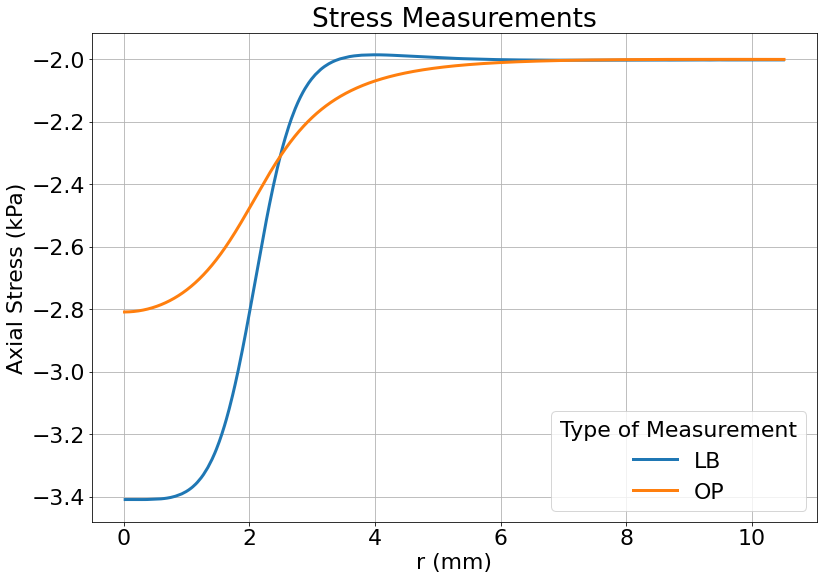

In [76]:
# Specify v1 and v2
%matplotlib inline

v1 = 0
v2 = 0

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB", linewidth=3)
#plt.plot(np.array(Stress_BOP2[v1][v2])[:,0]*1000, np.array(Stress_BOP2[v1][v2])[:,1]/1000, label = "BOP_", linewidth=3)
plt.plot(np.array(Stress_OP[v1][v2])[:,0]*1000, np.array(Stress_OP[v1][v2])[:,1]/1000, label = "OP", linewidth=3)
#plt.plot(np.array(Stress_SOP[v1][v2])[:,0]*1000, np.array(Stress_SOP[v1][v2])[:,1]/1000, label = "SOP_", linewidth=3)


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Type of Measurement")
plt.title("Stress Measurements")
plt.xlabel("r (mm)")
plt.ylabel("Axial Stress (kPa)")
plt.grid()
#plt.xlim([0,2])
plt.show()

In [28]:
z2[0,4]

-2.6366688890172565

<IPython.core.display.Javascript object>


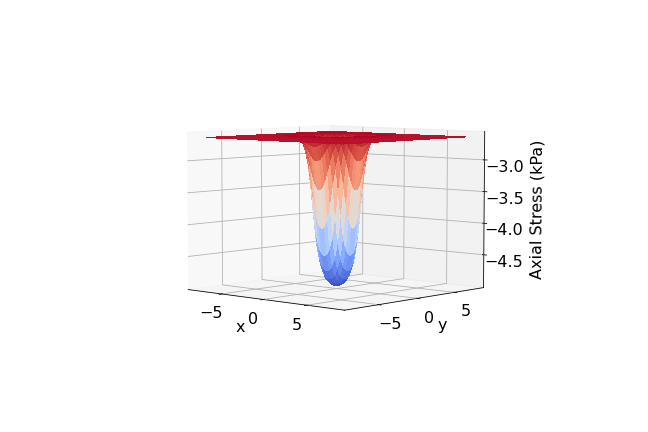

In [59]:
r = np.array(Stress_OP[v1][v2])[:,0]*1000
z = np.array(Stress_OP[v1][v2])[:,1]/1000
x = np.arange(-8,8,0.02)
y = np.arange(-8,8,0.02)
z2 = np.zeros([len(x),len(y)])
for i,xi in enumerate(x):
    for j,yj in enumerate(y):
        r_eq = np.sqrt(xi*xi+yj*yj)
        idx = (np.abs(r - r_eq)).argmin()
        z2[i,j] = z[idx]

mdic = {"z2": z2, "label": "Stress"}
savemat("matlab_matrix.mat", mdic)
        
%matplotlib notebook
#%matplotlib inline
plt.rcParams.update({'font.size': 16})

Y, X = np.meshgrid(y, x)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(9,6))
surf = ax.plot_surface(X, Y, z2, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(z2), vmax=np.nanmax(z2))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('Axial Stress (kPa)', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

<IPython.core.display.Javascript object>


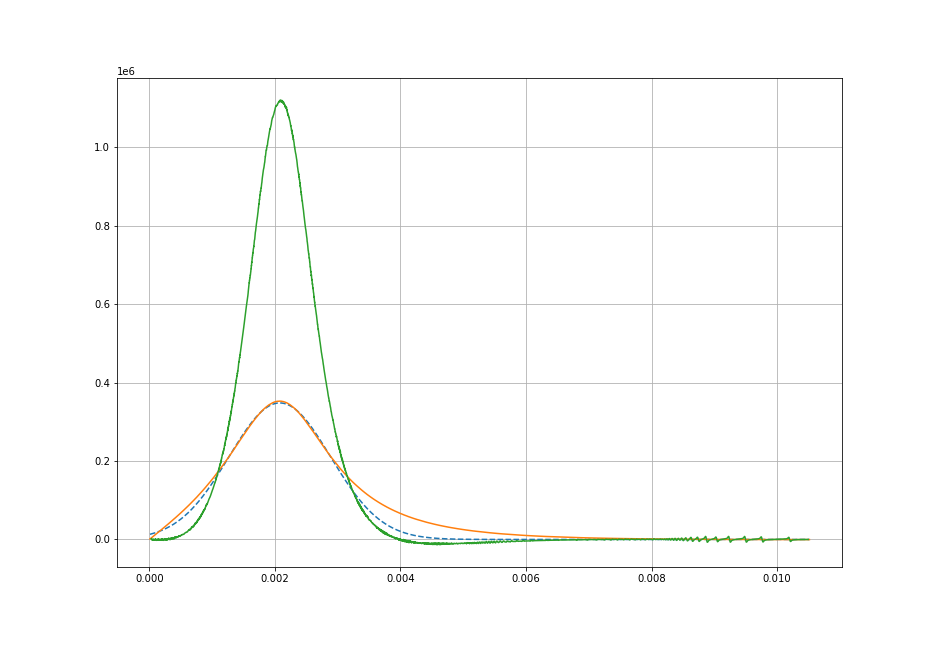

In [82]:
# Specify v1 and v2
%matplotlib notebook

plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(x, Gauss(x, *params), '--')
plt.plot(x, g)
plt.plot(xlb, glb)

plt.grid()
#plt.xlim([0,2])
plt.show()

In [60]:
print([lx,rx])

[0.0011451973055955022, 0.002824024797882885]


In [62]:
m

1146273.4581468105

In [64]:
mx

0.0020201615639962255

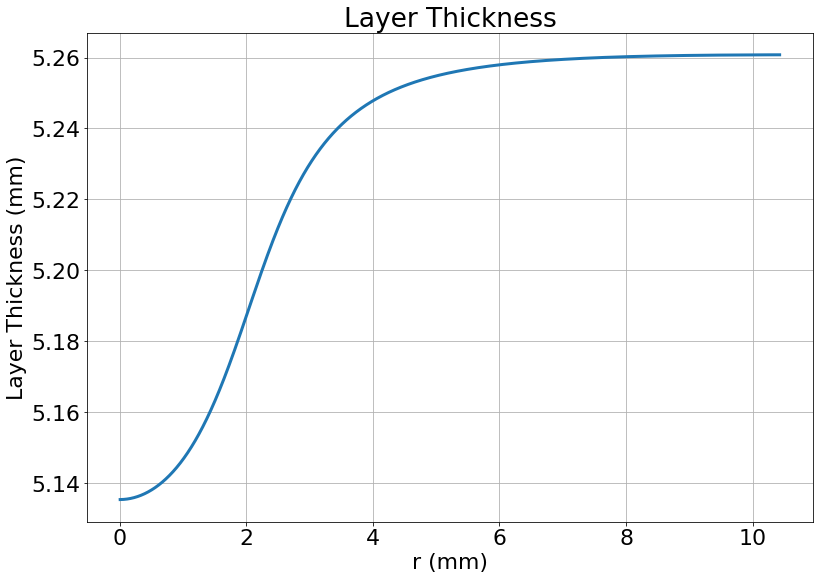

In [115]:
# Specify v1 and v2
%matplotlib inline

v1 = 0
v2 = 0

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(np.array(LTinf[v1][v2])[:,0]*1000, np.array(LTinf[v1][v2])[:,1]*1000, linewidth=3)
plt.title("Layer Thickness")
plt.xlabel("r (mm)")
plt.ylabel("Layer Thickness (mm)")
plt.grid()
#plt.xlim([0,2])
plt.show()

In [68]:
np.array(LTinf[0][0])[-1,1]

0.0038226557162217793

In [69]:
(3.822266-4.24)/4.24

-0.09852216981132081

In [12]:
z = np.array(Stress_LB[v1][v2])[:,1]
z[-1]

-1635.2446917724608

In [ ]:
# Sim uses coefficients and mooney rivlin fit, doesn't match data very well, 